In [1]:
import glob

import numpy
import torch
import PIL.Image
import torchvision.tv_tensors
import torchvision.transforms.v2

transforms = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.CenterCrop((224, 224)),
    torchvision.transforms.v2.Resize((64, 64)),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])
def transforms_wrapper(image, mask):
    image = torchvision.tv_tensors.Image(image)
    mask = torchvision.tv_tensors.Mask(mask)
    return transforms(image, mask)

def load_dataset(path):
    images, masks = [], []
    for filename in glob.glob(f"{path}/image/*"):
        image, mask = transforms_wrapper(
            PIL.Image.open(filename),
            PIL.Image.open(filename.replace("image", "mask").replace("jpg", "png"))
        )
        images.append(image.permute((1, 2, 0)).numpy())
        masks.append(mask.squeeze().numpy())
    return numpy.array(images), numpy.array(masks)

train_images, train_masks = load_dataset("midv500p/train")
test_images, test_masks = load_dataset("midv500p/val")

train_images.shape, train_masks.shape, test_images.shape, test_masks.shape

((553, 64, 64, 3), (553, 64, 64), (62, 64, 64, 3), (62, 64, 64))

In [3]:
import cvtda.topology

extractor = cvtda.topology.FeatureExtractor(n_jobs = 1, only_get_from_dump = False, return_diagrams = False)
extractor = extractor.fit(train_images, "1/train")
train_features = extractor.transform(train_images, "1/train")
test_features = extractor.transform(test_images, "1/test")

train_features.shape, test_features.shape

Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42104.45it/s]

GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = True


Saving the result to ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.50s/it]


Saving the result to ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = True
Saving the result to ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


Saving the result to ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = True
Saving the result to ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


Saving the result to ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = False
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = True
Saving the result to ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.32s/it]


Saving the result to ./1/train/greyscale/blue/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = False
Got the result from ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48079.48it/s]


GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = False
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = False
Got the result from ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 43123.68it/s]


GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = True
Saving the result to ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.27s/it]


Saving the result to ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = True
Saving the result to ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


Saving the result to ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = True
Saving the result to ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.10s/it]


Saving the result to ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = False
Got the result from ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = True
Saving the result to ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.38s/it]


Saving the result to ./1/train/inverted_greyscale/blue/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = False
Got the result from ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 38118.76it/s]


GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = False
Got the result from ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = False
Got the result from ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/bl

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39211.03it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.94s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.95s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.95s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/blue/features.npy
Fitting filtration 2/72: 2/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48074.49it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Fitting filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52632.24it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Fitting filtration 4/72: 2/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44027.37it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Fitting filtration 5/72: 2/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40934.84it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Fitting filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49172.15it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Fitting filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48074.49it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Fitting filtration 8/72: 2/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47996.90it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.89s/it]


Saving the result to ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Fitting filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48040.64it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.84s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.97s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
Fitting filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52625.07it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.90s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.88s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
Fitting filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52653.74it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.25s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
Fitting filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27198.69it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
Fitting filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48061.54it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
Fitting filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23387.92it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.32s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.99s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
Fitting filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50083.13it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.20s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.25s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.13s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
Fitting filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 57736.54it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
Fitting filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26182.44it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.26s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.30s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
Fitting filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22468.11it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.38s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.30s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/features.npy
Fitting filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24029.28it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.20s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/features.npy
Fitting filtration 20/72: 2/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48071.50it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.37s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.50s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_38_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/features.npy
Fitting filtration 21/72: 2/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27633.23it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.27s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
Fitting filtration 22/72: 2/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42491.67it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
Fitting filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 37282.40it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.31s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/features.npy
Fitting filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24125.50it/s]


FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.32s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


Saving the result to ./1/train/filtrations/2/RadialFiltration_51_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/features.npy
Fitting filtration 25/72: 4/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42497.89it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Fitting filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50096.11it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.82s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.92s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.96s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Fitting filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 34566.55it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.99s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Fitting filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29106.64it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Fitting filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.06s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
Fitting filtration 30/72: 4/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 45864.31it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.30s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Fitting filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46076.60it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.20s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.26s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.27s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.20s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Fitting filtration 32/72: 4/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 21241.94it/s]


FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.17s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.23s/it]


Saving the result to ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Fitting filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55036.31it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.26s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.15s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.26s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/features.npy
Fitting filtration 34/72: 4/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50281.82it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/features.npy
Fitting filtration 35/72: 4/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50060.43it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.26s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.75s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
Fitting filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22078.65it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
Fitting filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55305.33it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.12s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
Fitting filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55203.97it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.77s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.01s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/features.npy
Fitting filtration 39/72: 4/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27505.75it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.07s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.61s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/features.npy
Fitting filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40130.98it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.88s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_25_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/features.npy
Fitting filtration 41/72: 4/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52292.87it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.68s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.91s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.10s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.04s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/features.npy
Fitting filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50214.33it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/features.npy
Fitting filtration 43/72: 4/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29688.20it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.96s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.77s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.21s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/features.npy
Fitting filtration 44/72: 4/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30655.42it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.28s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.13s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.27s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
Fitting filtration 45/72: 4/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24980.88it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  4.00s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.33s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.22s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
Fitting filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47562.85it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.01s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.22s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
Fitting filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 31591.10it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
Fitting filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22941.68it/s]


FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.23s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Saving the result to ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
Fitting filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29344.90it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:09<00:00,  4.62s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Fitting filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39260.81it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.19s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.37s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Fitting filtration 51/72: 6/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24060.94it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Fitting filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 31143.17it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.30s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Fitting filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23026.87it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.11s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.24s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = True, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Fitting filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25589.70it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.38s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = True, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.73s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Fitting filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22946.45it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.50s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Fitting filtration 56/72: 6/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25548.26it/s]


FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.57s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = True, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]


Saving the result to ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Fitting filtration 57/72: 6/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23454.38it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.82s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
Fitting filtration 58/72: 6/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 41470.59it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.66s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
Fitting filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52443.03it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.54s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.16s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.24s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.02s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
Fitting filtration 60/72: 6/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46085.76it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.18s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/blue, do_fit = True, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.18s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_12_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/features.npy
Fitting filtration 61/72: 6/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55305.33it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.07s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:05<00:00,  2.93s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.01s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
Fitting filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48040.64it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.40s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.02s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.70s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.60s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
Fitting filtration 63/72: 6/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23908.65it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.08s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.17s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
Fitting filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 34508.95it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.18s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.81s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/blue, do_fit = True, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:09<00:00,  4.51s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
Fitting filtration 65/72: 6/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23988.02it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.13s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:10<00:00,  5.05s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.50s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
Fitting filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44296.44it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.44s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.15s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.77s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
Fitting filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26262.48it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.07s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.12s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  4.00s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
Fitting filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47902.73it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.13s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/blue, do_fit = True, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
Fitting filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48047.61it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.99s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.78s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.89s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.65s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
Fitting filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48042.63it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.17s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.93s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
Fitting filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25578.41it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.35s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.35s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
Fitting filtration 72/72: 6/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48058.56it/s]


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.71s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:08<00:00,  4.03s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:06<00:00,  3.46s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/blue, do_fit = True, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
DiagramVectorizer: fitting complete


DiagramVectorizer: batch: 100%|██████████| 2/2 [00:07<00:00,  3.62s/it]


Saving the result to ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26503.46it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/d

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 38173.34it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52654.94it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 4/72: 2/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47905.70it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25698.57it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48041.63it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22719.44it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47642.97it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47817.80it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29071.62it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24566.28it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 33439.30it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55248.68it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52580.93it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26142.60it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 31609.18it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48070.51it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39039.44it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49902.11it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22902.49it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25646.29it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
Applying filtration 22/72: 2/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46930.58it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25151.00it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39441.06it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47998.88it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46019.92it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 37824.11it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39216.33it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/Heigh

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52390.90it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 30/72: 4/Heigh

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48005.84it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24455.42it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52951.86it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48055.57it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/blue/features.npy
Applying filtration 34/72: 4/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52621.49it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36597.09it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 31562.30it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44113.62it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48076.49it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 35653.68it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25166.55it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/features.npy
Applying filtration 41/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 35661.90it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24027.29it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/features.npy
Applying filtration 43/72: 4/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52650.16it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/features.npy
Applying filtration 44/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24180.33it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49401.51it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26903.09it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22053.25it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 51981.13it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49995.69it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26305.67it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 51/72: 6/HeightFiltrartion

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 43792.96it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40942.07it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22987.84it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46036.36it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48041.63it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24196.98it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50242.61it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52413.40it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29602.95it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
Applying filtration 60/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 25073.24it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44198.52it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22999.69it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
Applying filtration 63/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52415.77it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52598.82it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
Applying filtration 65/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23659.17it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42141.17it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22100.31it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 34257.17it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23375.66it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24211.38it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40896.59it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
Applying filtration 72/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24362.95it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
RGB images received. Transforming to grayscale.


RGBGeometryExtractor: 100%|██████████| 553/553 [00:06<00:00, 87.19it/s] 


Saving the result to ./1/train/geometry/rgb/features.npy


GrayGeometryExtractor: 100%|██████████| 553/553 [01:07<00:00,  8.23it/s]


Saving the result to ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/gray/features.npy


GrayGeometryExtractor: 100%|██████████| 553/553 [01:05<00:00,  8.46it/s]


Saving the result to ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/red/features.npy


GrayGeometryExtractor: 100%|██████████| 553/553 [01:10<00:00,  7.90it/s]


Saving the result to ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/green/features.npy


GrayGeometryExtractor: 100%|██████████| 553/553 [01:02<00:00,  8.90it/s]


Saving the result to ./1/train/geometry/blue/features.npy
Got the result from ./1/train/geometry/blue/features.npy
RGB images received. Transforming to grayscale.
Got the result from ./1/train/geometry/rgb/features.npy


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22818.90it/s]


Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/blue/features.npy
Applying StandardScaler.
Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23823.44it/s]


GreyscaleExtractor: processing 1/train/greyscale/gray, do_fit = False
Got the result from ./1/train/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/greyscale/red, do_fit = False
Got the result from ./1/train/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/greyscale/green, do_fit = False
Got the result from ./1/train/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/greyscale/blue, do_fit = False
Got the result from ./1/train/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48063.54it/s]


GreyscaleExtractor: processing 1/train/inverted_greyscale/gray, do_fit = False
Got the result from ./1/train/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/red, do_fit = False
Got the result from ./1/train/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/green, do_fit = False
Got the result from ./1/train/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/train/inverted_greyscale/blue, do_fit = False
Got the result from ./1/train/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/inverted_greyscale/bl

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30692.33it/s]


FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_-1/green/d

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30302.58it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46028.14it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52632.24it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 5/72: 2/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46382.51it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48075.49it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 44233.08it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/Height

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24559.00it/s]

FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_1

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24781.51it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47834.56it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40600.22it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47790.21it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_12_51/blue/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49481.60it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48075.49it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 50227.38it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42518.93it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52615.52it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42438.80it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_25/blue/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 22100.95it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_38/blue/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23598.27it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_38_51/blue/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48051.59it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_12/blue/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48031.69it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40943.51it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_38/blue/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42434.92it/s]

FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/2/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/2/RadialFiltration_51_51/blue/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 51615.60it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72:

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 43805.36it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 37876.61it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23027.09it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52644.18it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 30/72: 4/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52617.91it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27657.28it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 32/72: 4/Heigh

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47923.51it/s]

FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39112.51it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got 

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52579.74it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_25/blue/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 54413.98it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 23027.55it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 31995.95it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_12/blue/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 54424.19it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_25/blue/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 33338.37it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_38/blue/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 57551.74it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_25_51/blue/features.npy
Applying filtration 41/72: 4/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47771.51it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_12/blue/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 39354.07it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_25/blue/features.npy
Applying filtration 43/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 46171.07it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_38/blue/features.npy
Applying filtration 44/72: 4/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48008.82it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_38_51/blue/features.npy
Applying filtration 45/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27615.79it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 26983.21it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 35003.17it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 55068.97it/s]

FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/4/RadialFiltration_51_51/blue/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52638.21it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/green/d

Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40678.55it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying S

Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24045.72it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 30699.64it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52647.77it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52191.67it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 27698.23it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 56/72: 6/Heigh

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24773.83it/s]

FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)


Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 57/72: 6/RadialFiltration_

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 42096.05it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltr

rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47695.87it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 43606.06it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_38/blue/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48057.56it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_12_51/blue/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48051.59it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 47693.91it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_25/blue/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 49730.92it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40933.40it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/red/features.npy


FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_25_51/blue/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 29022.51it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Apply

Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 28420.80it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_25/blue/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24472.19it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24394.98it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_38_51/blue/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 36839.47it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_12/blue/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 40117.79it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 48240.47it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)


Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_38/blue/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 52642.99it/s]

FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/diagrams.npy


Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/train/filtrations/6/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./1/train/filtrations/6/RadialFiltration_51_51/blue/features.npy
RGB images received. Transforming to grayscale.
Got the result from ./1/train/geometry/rgb/features.npy


rgb2gray: 100%|██████████| 553/553 [00:00<00:00, 24626.80it/s]

Got the result from ./1/train/geometry/gray/features.npy
Got the result from ./1/train/geometry/red/features.npy
Got the result from ./1/train/geometry/green/features.npy
Got the result from ./1/train/geometry/blue/features.npy


Applying StandardScaler.
Calculating inverted images
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20971.52it/s]

GreyscaleExtractor: processing 1/test/greyscale/gray, do_fit = False


Saving the result to ./1/test/greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/greyscale/gray/features.npy
GreyscaleExtractor: processing 1/test/greyscale/red, do_fit = False
Saving the result to ./1/test/greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Saving the result to ./1/test/greyscale/red/features.npy
GreyscaleExtractor: processing 1/test/greyscale/green, do_fit = False
Saving the result to ./1/test/greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/greyscale/green/features.npy
GreyscaleExtractor: processing 1/test/greyscale/blue, do_fit = False
Saving the result to ./1/test/greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


Saving the result to ./1/test/greyscale/blue/features.npy
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31005.94it/s]


GreyscaleExtractor: processing 1/test/inverted_greyscale/gray, do_fit = False
Saving the result to ./1/test/inverted_greyscale/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/inverted_greyscale/gray/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/red, do_fit = False
Saving the result to ./1/test/inverted_greyscale/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


Saving the result to ./1/test/inverted_greyscale/red/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/green, do_fit = False
Saving the result to ./1/test/inverted_greyscale/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/inverted_greyscale/green/features.npy
GreyscaleExtractor: processing 1/test/inverted_greyscale/blue, do_fit = False
Saving the result to ./1/test/inverted_greyscale/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/inverted_greyscale/blue/features.npy
Applying filtrations
Applying filtration 1/72: 2/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15491.89it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 2/72: 2/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62019.28it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 3/72: 2/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31024.44it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 4/72: 2/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15500.20it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 5/72: 2/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15502.05it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 6/72: 2/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 7/72: 2/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31017.04it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 8/72: 2/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 24693.46it/s]


FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/2/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 9/72: 2/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31009.64it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_12/blue/features.npy
Applying filtration 10/72: 2/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62004.49it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_25/blue/features.npy
Applying filtration 11/72: 2/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31028.14it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_38/blue/features.npy
Applying filtration 12/72: 2/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20678.03it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_12_51/blue/features.npy
Applying filtration 13/72: 2/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30976.40it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_12/blue/features.npy
Applying filtration 14/72: 2/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 24731.04it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_25/blue/features.npy
Applying filtration 15/72: 2/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31020.74it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_38/blue/features.npy
Applying filtration 16/72: 2/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20062.25it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_25_51/blue/features.npy
Applying filtration 17/72: 2/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 13748.18it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_12/blue/features.npy
Applying filtration 18/72: 2/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 24691.12it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_25/blue/features.npy
Applying filtration 19/72: 2/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17643.45it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_38/blue/features.npy
Applying filtration 20/72: 2/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 41211.86it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_38_51/blue/features.npy
Applying filtration 21/72: 2/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17693.87it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_12/blue/features.npy
Applying filtration 22/72: 2/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17642.26it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_25/blue/features.npy
Applying filtration 23/72: 2/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 29689.10it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_38/blue/features.npy
Applying filtration 24/72: 2/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17668.63it/s]


FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/2/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/2/RadialFiltration_51_51/blue/features.npy
Applying filtration 25/72: 4/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 41094.63it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 26/72: 4/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62108.16it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 27/72: 4/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17671.03it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 28/72: 4/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 14433.42it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 29/72: 4/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30991.16it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 30/72: 4/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30980.09it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 31/72: 4/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31028.14it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 32/72: 4/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61974.94it/s]


FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/4/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 33/72: 4/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 41192.28it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_12/blue/features.npy
Applying filtration 34/72: 4/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62078.50it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_25/blue/features.npy
Applying filtration 35/72: 4/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15507.59it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_38/blue/features.npy
Applying filtration 36/72: 4/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 41198.80it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_12_51/blue/features.npy
Applying filtration 37/72: 4/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15495.58it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_12/blue/features.npy
Applying filtration 38/72: 4/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62019.28it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_25/blue/features.npy
Applying filtration 39/72: 4/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20673.09it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_38/blue/features.npy
Applying filtration 40/72: 4/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30031.97it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_25_51/blue/features.npy
Applying filtration 41/72: 4/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20666.52it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_12/blue/features.npy
Applying filtration 42/72: 4/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62004.49it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_25/blue/features.npy
Applying filtration 43/72: 4/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15494.66it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_38/blue/features.npy
Applying filtration 44/72: 4/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20309.81it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_38_51/blue/features.npy
Applying filtration 45/72: 4/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20658.31it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_12/blue/features.npy
Applying filtration 46/72: 4/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20666.52it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_25/blue/features.npy
Applying filtration 47/72: 4/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31065.21it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_38/blue/features.npy
Applying filtration 48/72: 4/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61989.71it/s]


FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/4/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Saving the result to ./1/test/filtrations/4/RadialFiltration_51_51/blue/features.npy
Applying filtration 49/72: 6/HeightFiltrartion_-1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20669.81it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_-1/blue/features.npy
Applying filtration 50/72: 6/HeightFiltrartion_1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30976.40it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_1/blue/features.npy
Applying filtration 51/72: 6/HeightFiltrartion_1_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 19933.07it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 1, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_-1/blue/features.npy
Applying filtration 52/72: 6/HeightFiltrartion_-1_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_1/blue/features.npy
Applying filtration 53/72: 6/HeightFiltrartion_0_-1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30297.90it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/gray, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/red, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/green, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_-1/blue, do_fit = False, filtration = HeightFiltration(direction=array([ 0, -1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_-1/blue/features.npy
Applying filtration 54/72: 6/HeightFiltrartion_0_1
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 28878.05it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/gray, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/red, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/green, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_0_1/blue, do_fit = False, filtration = HeightFiltration(direction=array([0, 1]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_0_1/blue/features.npy
Applying filtration 55/72: 6/HeightFiltrartion_-1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62063.69it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_-1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([-1,  0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_-1_0/blue/features.npy
Applying filtration 56/72: 6/HeightFiltrartion_1_0
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 17673.43it/s]


FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/gray, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/red, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/green, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/HeightFiltrartion_1_0/blue, do_fit = False, filtration = HeightFiltration(direction=array([1, 0]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Saving the result to ./1/test/filtrations/6/HeightFiltrartion_1_0/blue/features.npy
Applying filtration 57/72: 6/RadialFiltration_12_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 12396.17it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/red, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/green, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_12/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_12/blue/features.npy
Applying filtration 58/72: 6/RadialFiltration_12_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15491.89it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/red, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/green, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_25/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_25/blue/features.npy
Applying filtration 59/72: 6/RadialFiltration_12_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30983.78it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/red, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/green, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_38/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_38/blue/features.npy
Applying filtration 60/72: 6/RadialFiltration_12_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 24712.23it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/gray, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/red, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/green, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_12_51/blue, do_fit = False, filtration = RadialFiltration(center=array([12, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_12_51/blue/features.npy
Applying filtration 61/72: 6/RadialFiltration_25_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 62004.49it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/red, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/green, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_12/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_12/blue/features.npy
Applying filtration 62/72: 6/RadialFiltration_25_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20668.16it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/red, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/green, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_25/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_25/blue/features.npy
Applying filtration 63/72: 6/RadialFiltration_25_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30991.16it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/red, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/green, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_38/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_38/blue/features.npy
Applying filtration 64/72: 6/RadialFiltration_25_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30910.12it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/gray, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/red, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/green, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_25_51/blue, do_fit = False, filtration = RadialFiltration(center=array([25, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_25_51/blue/features.npy
Applying filtration 65/72: 6/RadialFiltration_38_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 61974.94it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/red, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/green, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_12/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_12/blue/features.npy
Applying filtration 66/72: 6/RadialFiltration_38_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 24839.70it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/red, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/green, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_25/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_25/blue/features.npy
Applying filtration 67/72: 6/RadialFiltration_38_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 15479.90it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/red, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/green, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_38/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_38/blue/features.npy
Applying filtration 68/72: 6/RadialFiltration_38_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31005.94it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/gray, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/red, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/green, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_38_51/blue, do_fit = False, filtration = RadialFiltration(center=array([38, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_38_51/blue/features.npy
Applying filtration 69/72: 6/RadialFiltration_51_12
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30957.96it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/red, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/green, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_12/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 12]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_12/blue/features.npy
Applying filtration 70/72: 6/RadialFiltration_51_25
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 30994.86it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/red, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/green, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_25/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 25]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_25/blue/features.npy
Applying filtration 71/72: 6/RadialFiltration_51_38
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 31013.34it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/red, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/green, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_38/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 38]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_38/blue/features.npy
Applying filtration 72/72: 6/RadialFiltration_51_51
RGB images received. Transforming to grayscale.


rgb2gray: 100%|██████████| 62/62 [00:00<00:00, 20663.24it/s]


FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/gray, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/gray/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/gray/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/red, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/red/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/red/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/green, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/green/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/green/features.npy
FiltrationExtractor: processing 1/test/filtrations/6/RadialFiltration_51_51/blue, do_fit = False, filtration = RadialFiltration(center=array([51, 51]), n_jobs=1)
Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/blue/diagrams.npy
Applying Scaler to persistence diagrams.


DiagramVectorizer: batch: 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]


Saving the result to ./1/test/filtrations/6/RadialFiltration_51_51/blue/features.npy
RGB images received. Transforming to grayscale.


RGBGeometryExtractor: 100%|██████████| 62/62 [00:00<00:00, 95.68it/s] 


Saving the result to ./1/test/geometry/rgb/features.npy


GrayGeometryExtractor: 100%|██████████| 62/62 [00:05<00:00, 11.16it/s]


Saving the result to ./1/test/geometry/gray/features.npy


GrayGeometryExtractor: 100%|██████████| 62/62 [00:06<00:00,  9.48it/s]


Saving the result to ./1/test/geometry/red/features.npy


GrayGeometryExtractor: 100%|██████████| 62/62 [00:06<00:00,  9.56it/s]


Saving the result to ./1/test/geometry/green/features.npy


GrayGeometryExtractor: 100%|██████████| 62/62 [00:06<00:00,  9.63it/s]

Saving the result to ./1/test/geometry/blue/features.npy
Applying StandardScaler.


((553, 47231), (62, 47231))

In [4]:
import cvtda.segmentation

cvtda.segmentation.segment(
    train_images, train_features, train_masks,
    test_images, test_features, test_masks,
    dump_name = "1/predictions", remove_cross_maps = True
)

Trying no - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001ED3A5B8D00>
Parameters: 205504377


100%|██████████| 100/100 [00:44<00:00,  2.24it/s, loss=1.14e+6, lr=1e-6, Accuracy=0.757, AUC-ROC=0.831, Precision=0.705, Recall=0.767, F1-score=0.734, Jaccard score=0.58]  


Saving the result to ./1/predictions/no.npy
{'classifier': 'Без признаков', 'Accuracy': 0.7570997668850806, 'AUC-ROC': 0.830698922276628, 'Precision': 0.7047089168499198, 'Recall': 0.76651170318949, 'F1-score': 0.7343122095352133, 'Jaccard score': 0.5801685179135359}
Trying images - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001ED3A5B8E20>
Parameters: 205504377


100%|██████████| 100/100 [00:51<00:00,  1.93it/s, loss=3.67e+5, lr=1e-6, Accuracy=0.913, AUC-ROC=0.975, Precision=0.893, Recall=0.912, F1-score=0.902, Jaccard score=0.822] 


Saving the result to ./1/predictions/images.npy
{'classifier': 'Без топологических признаков', 'Accuracy': 0.9134442729334677, 'AUC-ROC': 0.9750824700085365, 'Precision': 0.8925630015486414, 'Recall': 0.9121384060642573, 'F1-score': 0.9022445376394775, 'Jaccard score': 0.8218993834012591}
Trying topological - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001ED3A5B9240>
Parameters: 205504377


100%|██████████| 100/100 [04:25<00:00,  2.66s/it, loss=4.84e+5, lr=1e-6, Accuracy=0.864, AUC-ROC=0.938, Precision=0.852, Recall=0.834, F1-score=0.843, Jaccard score=0.729] 


Saving the result to ./1/predictions/topological.npy
{'classifier': 'Только топологические признаки', 'Accuracy': 0.8641239289314516, 'AUC-ROC': 0.9382005880594989, 'Precision': 0.8524468133988881, 'Recall': 0.8340961612819107, 'F1-score': 0.8431716540013817, 'Jaccard score': 0.7288649668015558}
Trying combined - <cvtda.segmentation.MiniUnet.MiniUnet object at 0x000001ED3A5B8E80>
Parameters: 205578105


100%|██████████| 100/100 [19:46<00:00, 11.86s/it, loss=2.25e+5, lr=1e-6, Accuracy=0.93, AUC-ROC=0.978, Precision=0.928, Recall=0.912, F1-score=0.92, Jaccard score=0.852]   


Saving the result to ./1/predictions/combined.npy
{'classifier': 'Комбинированные признаки', 'Accuracy': 0.9304002331149194, 'AUC-ROC': 0.9776043153903902, 'Precision': 0.9276661118934836, 'Recall': 0.9121923585321332, 'F1-score': 0.9198641657939002, 'Jaccard score': 0.8516189692660281}


,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score,Jaccard score
0,Без признаков,0.757100,0.830699,0.704709,0.766512,0.734312,0.580169
1,Без топологических признаков,0.913444,0.975082,0.892563,0.912138,0.902245,0.821899
2,Только топологические признаки,0.864124,0.938201,0.852447,0.834096,0.843172,0.728865
3,Комбинированные признаки,0.930400,0.977604,0.927666,0.912192,0.919864,0.851619


### Show images

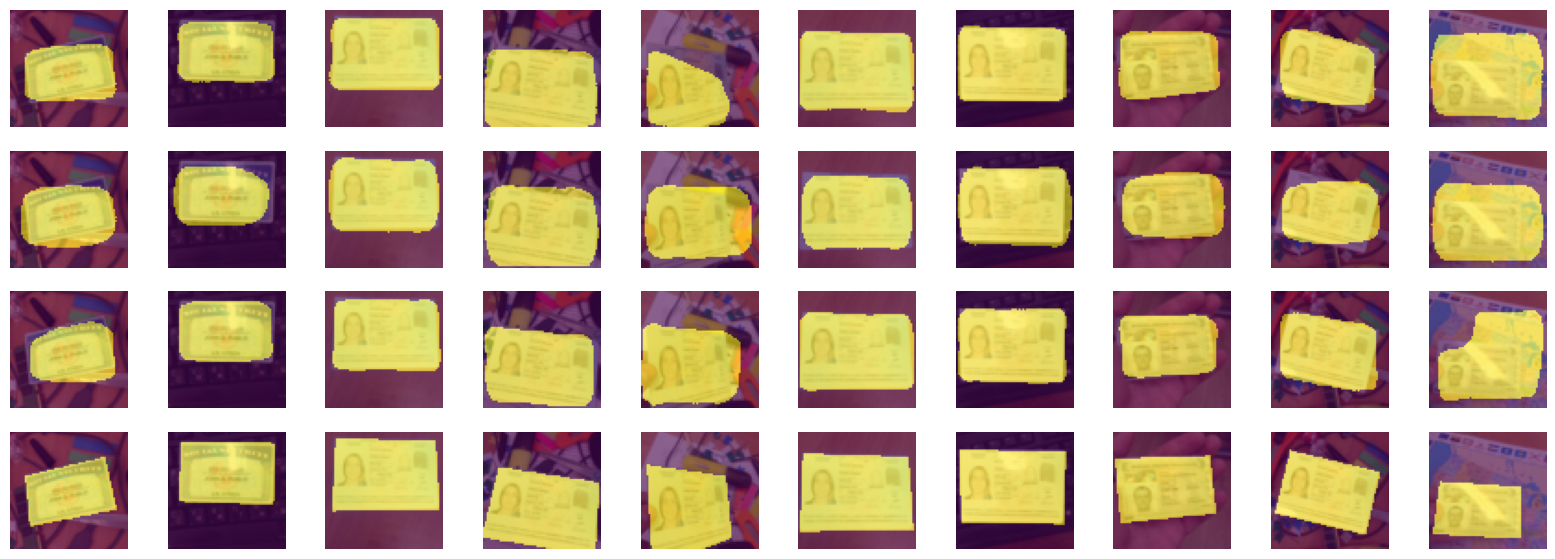

In [50]:
import matplotlib.pyplot as plt

pred_images = numpy.squeeze(numpy.load("1/predictions/images.npy"))
pred_topological = numpy.squeeze(numpy.load("1/predictions/topological.npy"))
pred_combined = numpy.squeeze(numpy.load("1/predictions/combined.npy"))

def show(ax, image, mask):
    ax.axis('off')
    ax.imshow(image)
    ax.imshow((mask > 0.5), vmin = 0, vmax = 1, alpha = 0.6)

fig, axes = plt.subplots(4, 10, figsize = (20, 7))

def show_by_index(ax_idx, index):
    show(axes[0][ax_idx], test_images[index], pred_images[index])
    show(axes[1][ax_idx], test_images[index], pred_topological[index])
    show(axes[2][ax_idx], test_images[index], pred_combined[index])
    show(axes[3][ax_idx], test_images[index], test_masks[index])

numpy.random.seed(1)
to_draw = numpy.random.choice(range(len(test_images)), size = 10)
for ax_idx, index in enumerate(to_draw):
    show_by_index(ax_idx, index)